In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scFunctions as sf
import pickle
import matplotlib

sc.settings.verbosity = 3

%config Completer.use_jedi = False

In [3]:
with open("../data/adata_new_orig.pickle", "rb") as f:
    adata = pickle.load(f)

In [4]:
adata_cDC1 = adata[adata.obs['Population'].isin(["cDC1"]), :].raw.to_adata().copy()
adata_cDC1

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


AnnData object with n_obs × n_vars = 5008 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'new_orig'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'new_orig_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


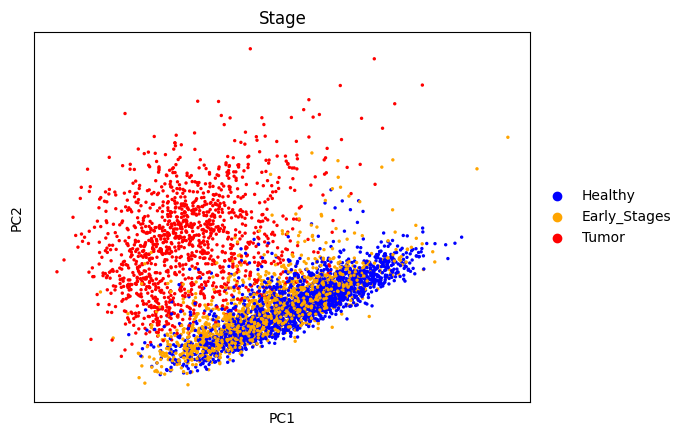

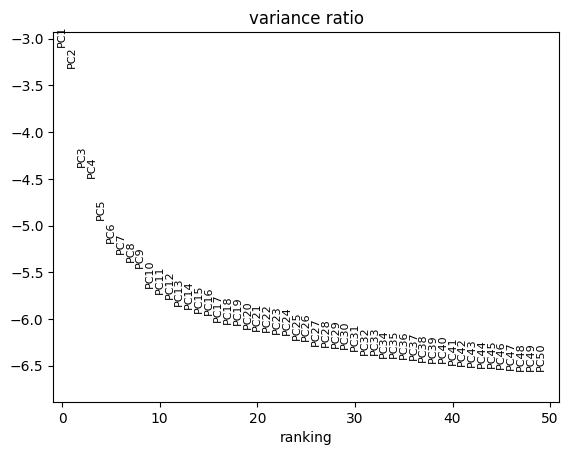

In [5]:
adata_cDC1 = sf.pp_PCA(adata_cDC1) # Function defined in scFunction.py

# Normalize, Log-transform, select HVG, scale data and perform PCA
sc.pl.pca(adata_cDC1, color = "Stage", palette={"Healthy" : "blue", "Early_Stages" : "orange", "Tumor" : "red"})
sc.pl.pca_variance_ratio(adata_cDC1, log=True, n_pcs = 50) #ndim = 20

computing neighbors
    using 'X_pca' with n_pcs = 20


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packag

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


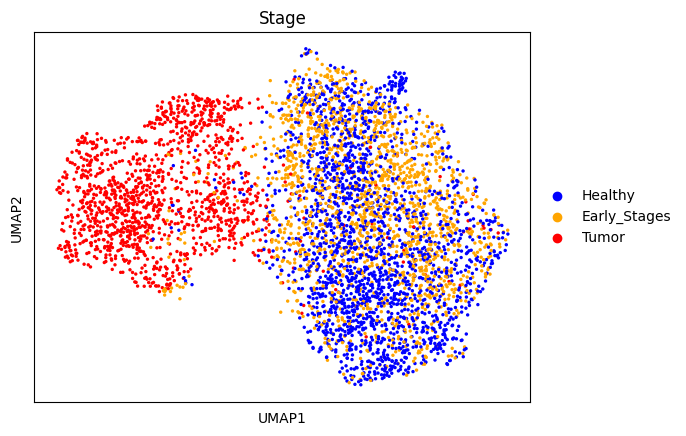

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


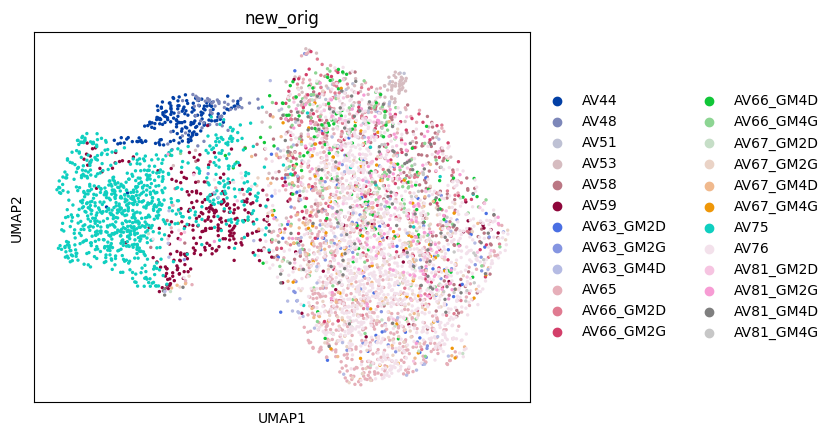

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


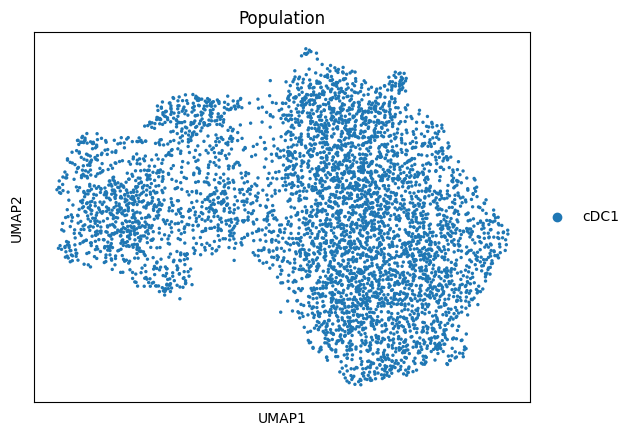

In [6]:
sc.pp.neighbors(adata_cDC1, n_pcs=20)
sc.tl.umap(adata_cDC1)
sc.pl.umap(adata_cDC1, color = 'Stage')
sc.pl.umap(adata_cDC1, color = 'new_orig')
sc.pl.umap(adata_cDC1, color = 'Population')

In [7]:
cell_cycle_genes = [x.strip().capitalize() for x in open('../data/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_cDC1.var_names]

sc.tl.score_genes_cell_cycle(adata_cDC1, s_genes=s_genes, g2m_genes=g2m_genes)

sc.pp.regress_out(adata_cDC1, ['S_score', 'G2M_score'])
sc.pp.scale(adata_cDC1)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
computing score 'G2M_score'


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['S_score', 'G2M_score']
    finished (0:00:07)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


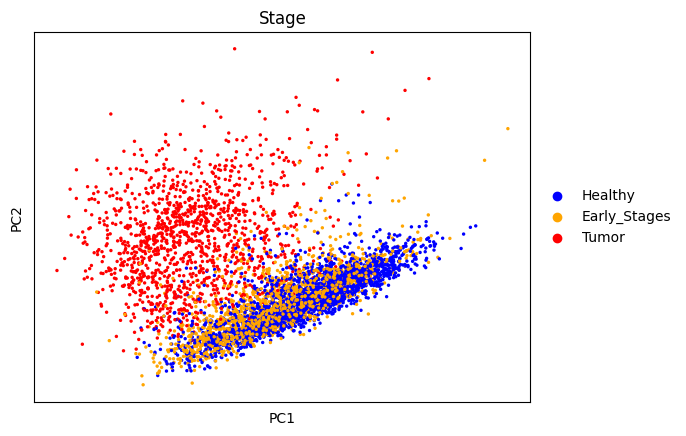

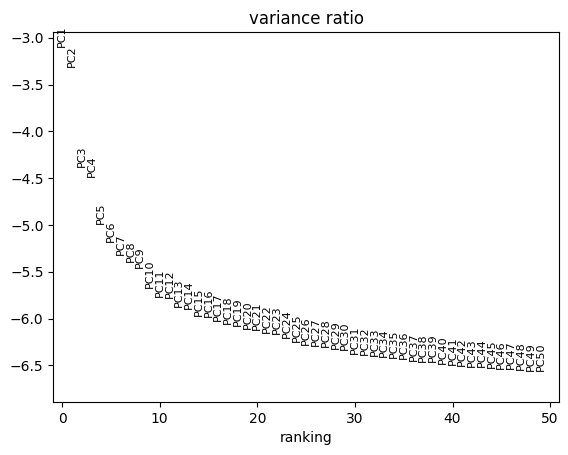

In [8]:
sc.tl.pca(adata_cDC1)
sc.pl.pca(adata_cDC1, color = "Stage", palette={"Healthy" : "blue", "Early_Stages" : "orange", "Tumor" : "red"})
sc.pl.pca_variance_ratio(adata_cDC1, log=True, n_pcs = 50) #ndim = 20

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


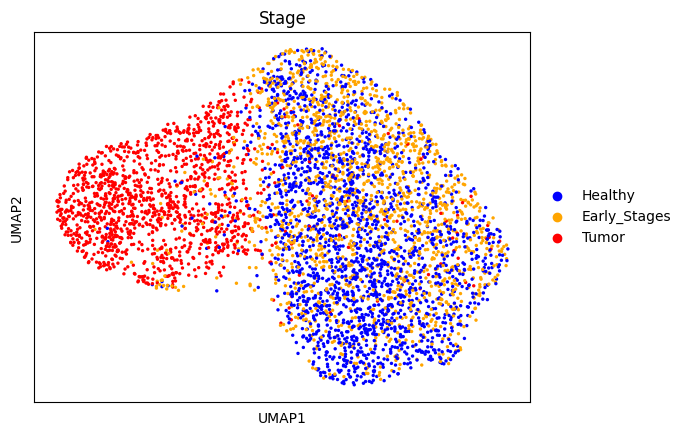

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


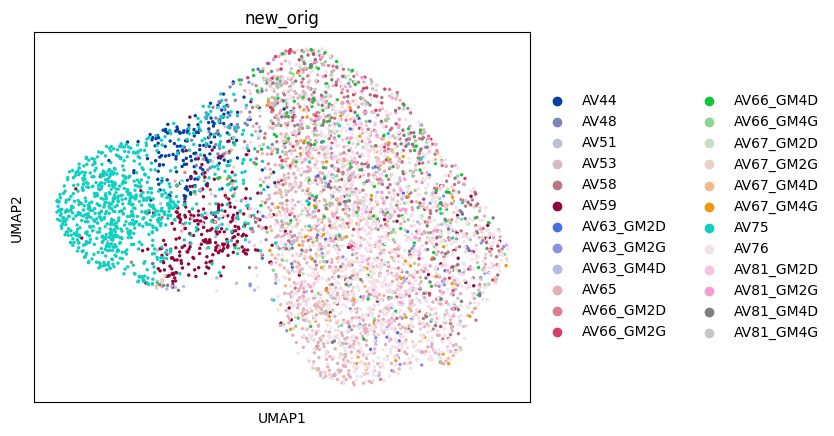

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


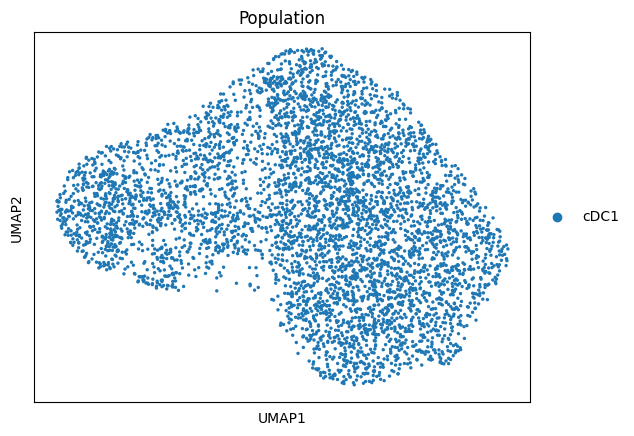

In [9]:
sc.pp.neighbors(adata_cDC1, n_pcs=6, n_neighbors=30)
sc.tl.umap(adata_cDC1)
sc.pl.umap(adata_cDC1, color = 'Stage')
sc.pl.umap(adata_cDC1, color = 'new_orig')
sc.pl.umap(adata_cDC1, color = 'Population')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


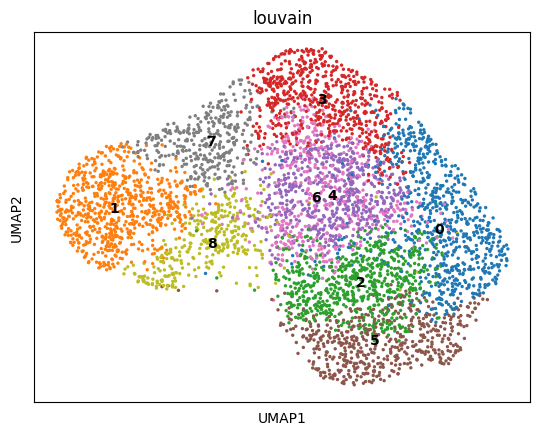

In [10]:
sc.tl.louvain(adata_cDC1, resolution = 0.8)
sc.pl.umap(adata_cDC1, color = 'louvain', legend_loc = 'on data')

computing density on 'umap'
--> added
    'umap_density_Stage', densities (adata.obs)
    'umap_density_Stage_params', parameter (adata.uns)


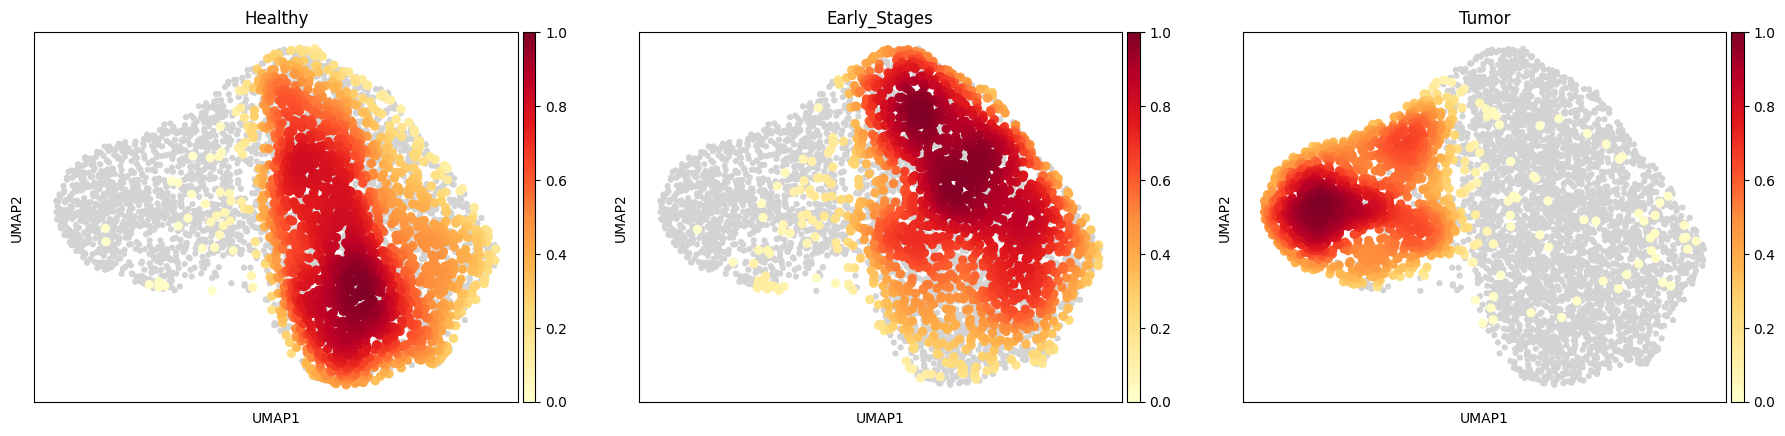

In [11]:
sc.tl.embedding_density(adata_cDC1, groupby="Stage")
sc.pl.embedding_density(adata_cDC1, groupby="Stage")

/Users/mscavino/Thèse/ITMO/scripts/scFunctions.py:27: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index()


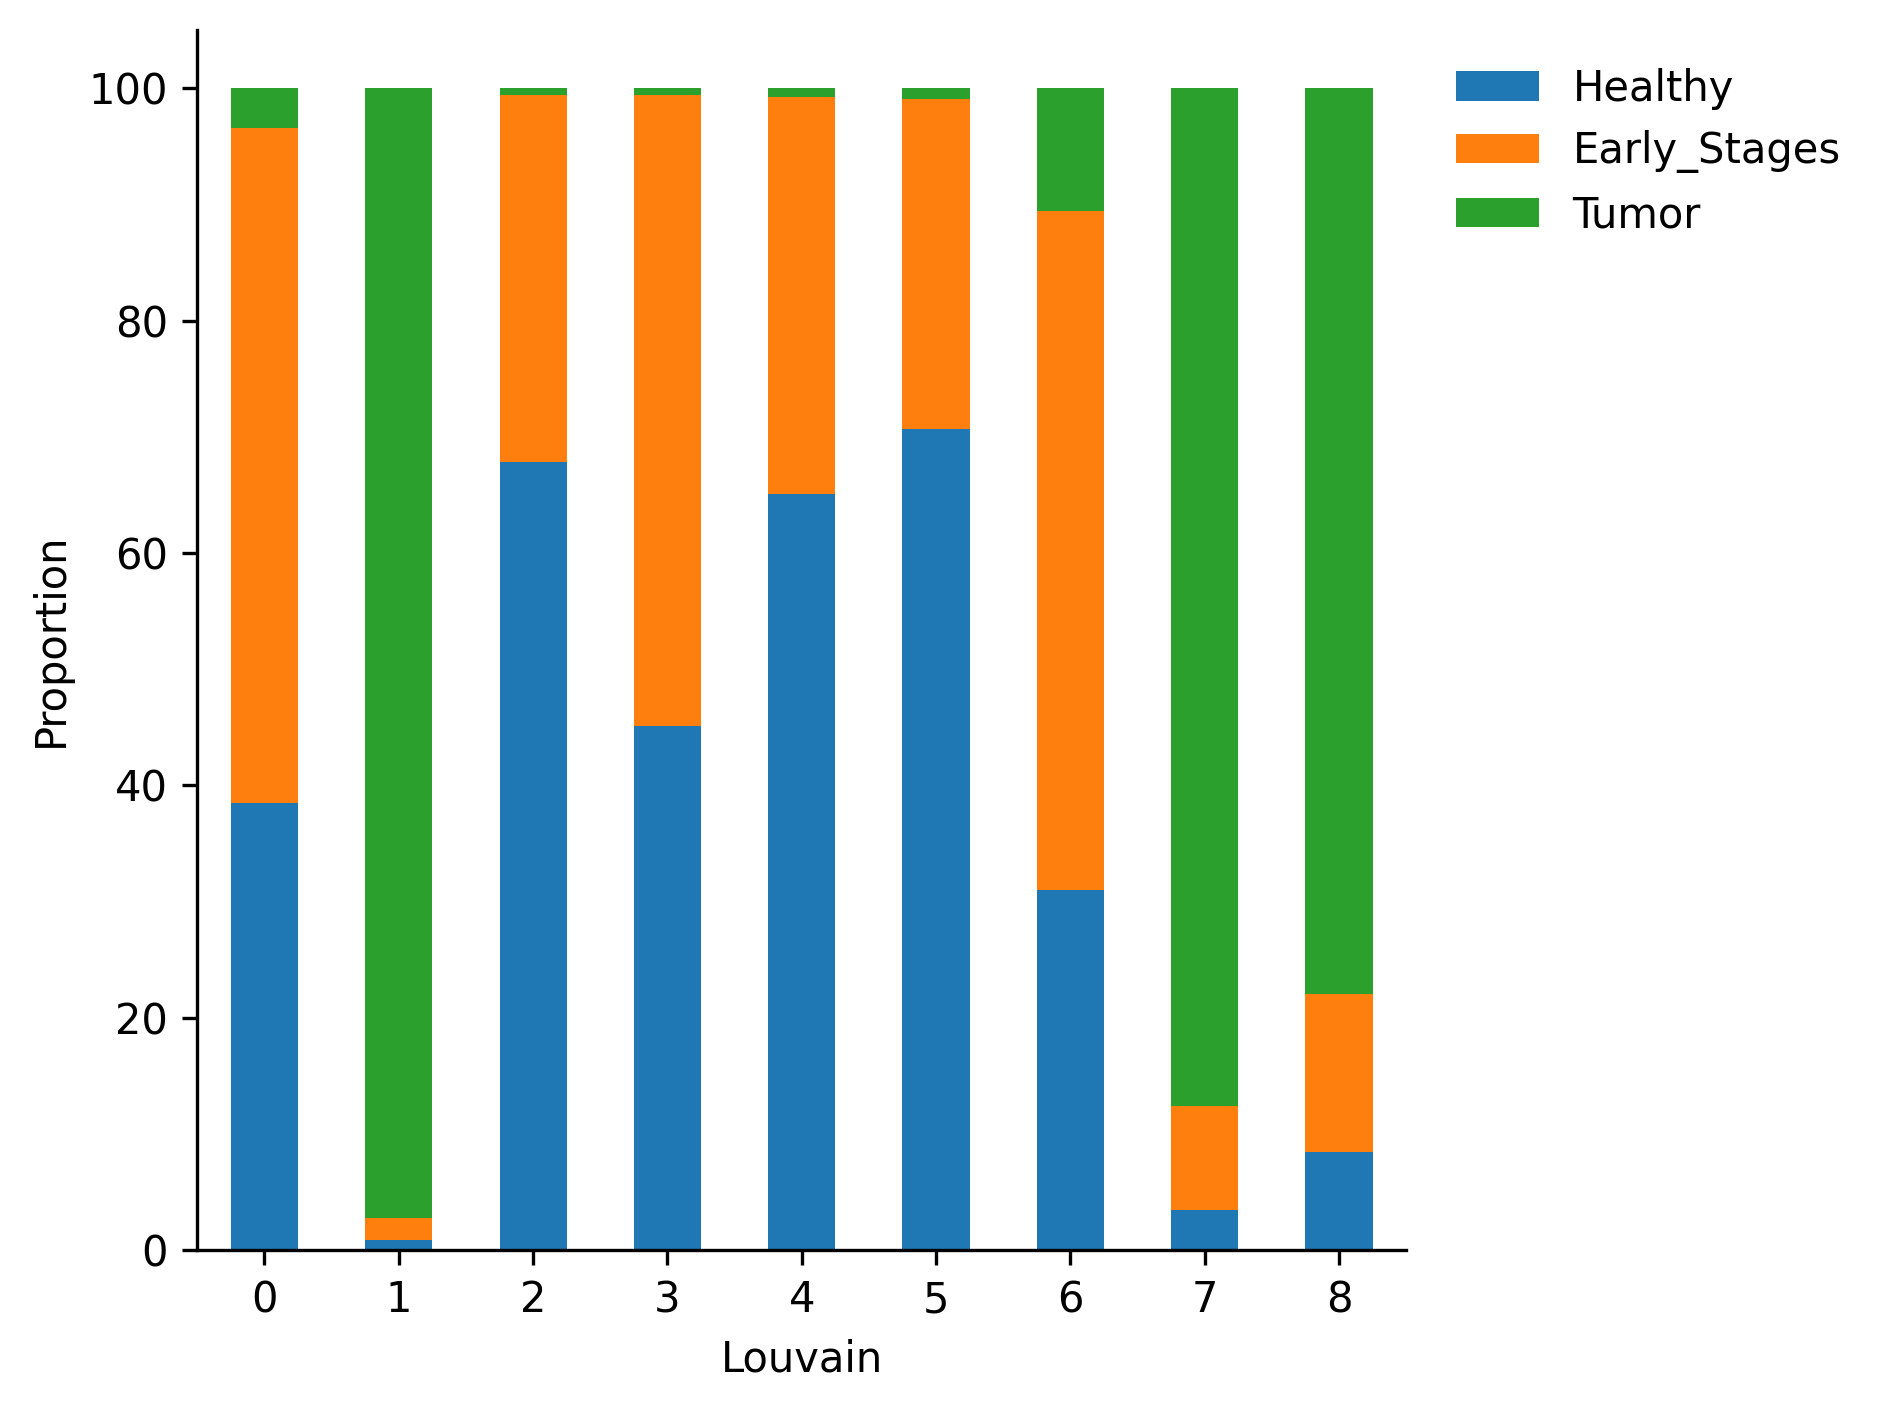

In [12]:
Stage_by_cluster = sf.get_cluster_proportions(adata_cDC1, cluster_key="Stage", sample_key="louvain")
fig = sf.plot_cluster_proportions(Stage_by_cluster)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: -1000, max_out_group_fraction: 0.5


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


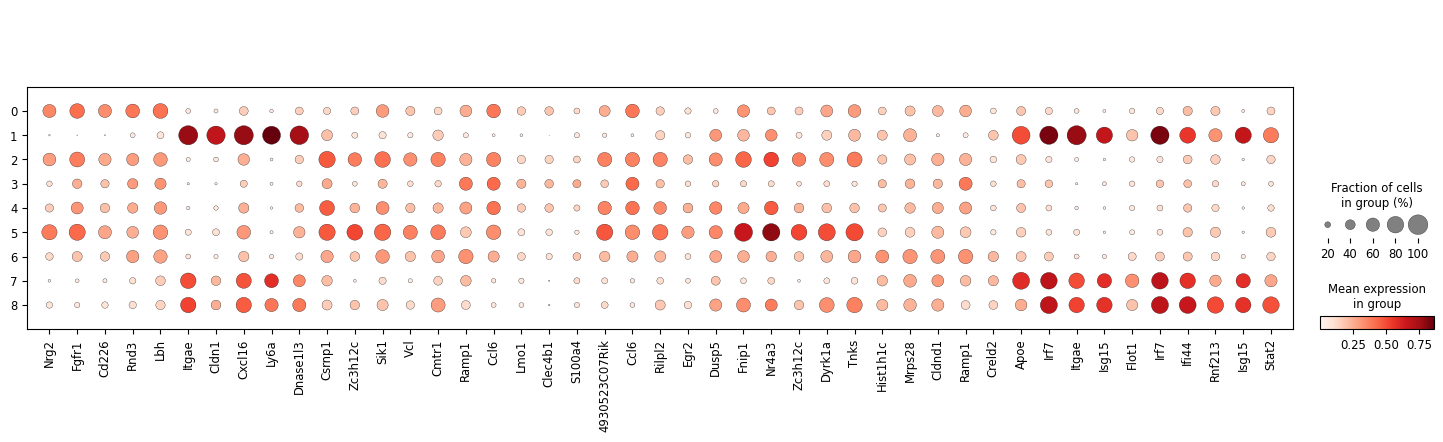

In [17]:
sc.tl.rank_genes_groups(adata_cDC1, "louvain")
sc.tl.filter_rank_genes_groups(adata_cDC1, min_fold_change=-1000, min_in_group_fraction = 0.1)



levels = [str(i) for i in range(len(np.unique(adata_cDC1.obs.louvain)))]

df = sc.get.rank_genes_groups_df(adata_cDC1, levels, key="rank_genes_groups_filtered")
df = df.dropna()
top5markers = df.groupby("group").head(5)

genes = top5markers.names.values



sc.pl.dotplot(adata_cDC1, genes, groupby="louvain")

#sc.pl.rank_genes_groups_dotplot(adata_cDC1, n_genes = 5)



In [20]:
sc.tl.rank_genes_groups(adata_cDC1, "Stage", groups = ["Early_Stages"], reference = "Healthy", key_added = "early_vs_healthy")
sc.tl.filter_rank_genes_groups(adata_cDC1, key = "early_vs_healthy", key_added = "early_vs_healthy_filtered", 
                               min_fold_change = -1000, min_in_group_fraction = 0.1)

ranking genes
    finished: added to `.uns['early_vs_healthy']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: -1000, max_out_group_fraction: 0.5


In [22]:
df = sc.get.rank_genes_groups_df(adata_cDC1, group = "Early_Stages", key = "early_vs_healthy_filtered")
df = df.dropna()
df_sorted = df.sort_values("logfoldchanges", ascending = False)
df_stat = df_sorted[df_sorted["pvals_adj"] < 0.01]
df_stat["-log_pval"] = -1*np.log10(df_stat["pvals_adj"])

liste = []
threshold = 0.58
for i in df_stat.values: #2 = foldchange, 4 = pval_adj
    if i[2] > threshold:
        liste.append("UP")
    elif i[2] < -threshold : 
        liste.append("DOWN")
    else:
        liste.append("NONE")
df_stat["assignation"] = liste

df_up = df_stat[df_stat["assignation"] == "UP"]
print(f"{df_up.shape[0]} DEG with logFC > {threshold}, showing top 20 : ")
df_up[0:20]

8 DEG with logFC > 0.58, showing top 20 : 


/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_896/2737725040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat["-log_pval"] = -1*np.log10(df_stat["pvals_adj"])
/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_896/2737725040.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat["assignation"] = liste


,names,scores,logfoldchanges,pvals,pvals_adj,-log_pval,assignation
2,B930036N10Rik,15.629284,1.872259,1.177238e-52,3.763043e-49,48.424461,UP
8,Gm26887,11.447911,1.188804,1.065582e-29,9.083025e-27,26.041769,UP
15,2810013P06Rik,9.869461,1.061172,1.267828e-22,6.003870e-20,19.221569,UP
0,Cdk8,18.688826,1.007793,4.542710e-74,3.872206e-70,69.412042,UP
23,Gm36486,9.035629,0.881570,2.864909e-19,8.721601e-17,16.059404,UP
4,Gm20513,13.180618,0.824904,1.143208e-38,1.827132e-35,34.738230,UP
28,Tcof1,8.790340,0.686185,2.379255e-18,6.613295e-16,15.179582,UP
47,Hist1h1c,7.320356,0.585344,3.088505e-13,4.346547e-11,10.361856,UP


In [23]:
df_down = df_stat[df_stat["assignation"] == "DOWN"]
df_down = df_down.sort_values("logfoldchanges", ascending = True)
print(f"{df_down.shape[0]} DEG with logFC < {-threshold}, showing top 20 : ")
df_down[0:20]

14 DEG with logFC < -0.58, showing top 20 : 


,names,scores,logfoldchanges,pvals,pvals_adj,-log_pval,assignation
25540,Gm43914,-10.505002,-0.797025,1.875284e-25,1.089881e-22,21.962621,DOWN
25543,Pik3c2a,-10.532473,-0.765804,1.412808e-25,8.811785e-23,22.054936,DOWN
25532,Stip1,-9.747796,-0.757683,3.493191e-22,1.567156e-19,18.804888,DOWN
25523,Crem,-9.529712,-0.746369,2.773955e-21,1.058740e-18,17.975211,DOWN
25545,Nuak2,-10.674310,-0.693178,3.246857e-26,2.128939e-23,22.671837,DOWN
25483,Timd4,-8.092492,-0.670774,7.869132e-16,1.636012e-13,12.786214,DOWN
25511,Arl5b,-8.913887,-0.660405,7.607480e-19,2.244026e-16,15.648972,DOWN
25510,Epb41,-8.883446,-0.658200,9.948534e-19,2.890953e-16,15.538959,DOWN
25454,Ell2,-7.633922,-0.650521,2.884807e-14,4.669005e-12,11.330776,DOWN
25539,Rilpl2,-10.422462,-0.645252,4.375312e-25,2.486344e-22,21.604439,DOWN
